**Math - Linear Algebra**

*Linear Algebra is the branch of mathematics that studies [vector spaces](https://en.wikipedia.org/wiki/Vector_space) and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc.*

*Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.*

*Course Notes - https://www.csc2.ncsu.edu/faculty/healey/msa/lin-alg/*

# Vectors
## Definition
A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity may be represented by the following vector:

**velocity** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Note: by convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as ${meters\_per\_second} = 5026$.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space… which most people find hard to imagine.


##  Purpose
Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.

Based on this vector our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:

**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

## Vectors in python
In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [6]:
[1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's `ndarray`, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out the [NumPy tutorial](tools_numpy.ipynb)). For example:

In [2]:
import numpy as np
video = np.array([1, 2, 3, 4, 5])
video

array([1, 2, 3, 4, 5])

The size of a vector can be obtained using the `size` attribute:

In [9]:
video.size

5

The $i^{th}$ element (also called *entry* or *item*) of a vector $\textbf{v}$ is noted $\textbf{v}_i$.

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access $\textbf{video}_3$ programmatically, we would write:

In [10]:
video[2]  # 3rd element

3

## Dot product
### Definition
The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### In python
The dot product is pretty simple to implement:

In [11]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

u = np.array([2, 5])
v = np.array([3, 1])

dot_product(u, v)

11

But a *much* more efficient implementation is provided by NumPy with the `dot` function:

In [13]:
np.dot(u,v)

11

### Main properties
* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [15]:
import numpy.linalg as LA

def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside of the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

**Orthogonal**: Perpendicular vectors $\vec{a}$ and $\vec{b}$ forming a 90° right angle where they meet. If $\textbf{u} \cdot \textbf{v} = 0$, then $\vec{a}$ and $\vec{b}$ are orthogonal

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [17]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [18]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

# Matrices
A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling.

## Matrices in python
In python, a matrix can be represented in various ways. The simplest is just a list of python lists:

In [19]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations:

In [4]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

By convention matrices generally have uppercase names, such as $A$.

## Size
The size of a matrix is defined by its number of rows and number of columns. It is noted $rows \times columns$. For example, the matrix $A$ above is an example of a $2 \times 3$ matrix: 2 rows, 3 columns. Caution: a $3 \times 2$ matrix would have 3 rows and 2 columns.

To get a matrix's size in NumPy:

In [21]:
A.shape

(2, 3)

**Caution**: the `size` attribute represents the number of elements in the `ndarray`, not the matrix's size:

In [22]:
A.size

6

## Element indexing
The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$, but there is no standard notation, so people often prefer to explicitely name the elements, like this: "*let $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". This means that $X$ is equal to:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

However in this notebook we will use the $X_{i,j}$ notation, as it matches fairly well NumPy's notation. Note that in math indices generally start at 1, but in programming they usually start at 0. So to access $A_{2,3}$ programmatically, we need to write this:

In [23]:
A[1,2]  # 2nd row, 3rd column

60

The $i^{th}$ row vector is sometimes noted $M_i$ or $M_{i,*}$, but again there is no standard notation so people often prefer to explicitely define their own names, for example: "*let **x**$_{i}$ be the $i^{th}$ row vector of matrix $X$*". We will use the $M_{i,*}$, for the same reason as above. For example, to access $A_{2,*}$ (ie. $A$'s 2nd row vector):

In [24]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

Similarly, the $j^{th}$ column vector is sometimes noted $M^j$ or $M_{*,j}$, but there is no standard notation. We will use $M_{*,j}$. For example, to access $A_{*,3}$ (ie. $A$'s 3rd column vector):

In [25]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

Note that the result is actually a one-dimensional NumPy array: there is no such thing as a *vertical* or *horizontal* one-dimensional array. If you need to actually represent a row vector as a one-row matrix (ie. a 2D NumPy array), or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example:

In [26]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

In [27]:
A[:, 2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix

array([[30],
       [60]])

## Square, triangular, diagonal and identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

You can construct a diagonal matrix using NumPy's `diag` function:

In [28]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the `diag` function, it will happily extract the diagonal values:

In [29]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Numpy's `eye` function returns the identity matrix of the desired size:

In [30]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below.

## Adding matrices
If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. Addition is performed *elementwise*: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matric $B$ and compute $A + B$:

In [14]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [33]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**Addition is *commutative***, meaning that $A + B = B + A$:

In [34]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**It is also *associative***, meaning that $A + (B + C) = (A + B) + C$:

In [36]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [37]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

## Scalar multiplication
A matrix $M$ can be multiplied by a scalar $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

A more concise way of writing this is:

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$

In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:

In [38]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Scalar multiplication is also defined on the right hand side, and gives the same result: $M \lambda = \lambda M$. For example:

In [39]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

This makes scalar multiplication **commutative**.

It is also **associative**, meaning that $\alpha (\beta M) = (\alpha \times \beta) M$, where $\alpha$ and $\beta$ are scalars. For example:

In [40]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [41]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finally, it is **distributive over addition** of matrices, meaning that $\lambda (Q + R) = \lambda Q + \lambda R$:

In [42]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [43]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's multiply two matrices in NumPy, using `ndarray`'s `dot` method:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [5]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Let's check this result by looking at one element, just to be sure: looking at $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [6]:
40*5 + 50*17 + 60*31

2910

In [7]:
E[1,2]  # row 2, column 3

2910

Looks good! You can check the other elements until you get used to the algorithm.

We multiplied a $2 \times 3$ matrix by a $3 \times 4$ matrix, so the result is a $2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiple $D$ by $A$, we get an error because D has 4 columns while A has 2 rows:

In [8]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


This illustrates the fact that **matrix multiplication is *NOT* commutative**: in general $QR ≠ RQ$

In fact, $QR$ and $RQ$ are only *both* defined if $Q$ has size $m \times n$ and $R$ has size $n \times m$. Let's look at an example where both *are* defined and show that they are (in general) *NOT* equal:

In [9]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [10]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

On the other hand, **matrix multiplication *is* associative**, meaning that $Q(RS) = (QR)S$. Let's create a $4 \times 5$ matrix $G$ to illustrate this:

In [11]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [12]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

It is also ***distributive* over addition** of matrices, meaning that $(Q + R)S = QS + RS$. For example:

In [15]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [16]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:

$M I_n = I_m M = M$

This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$MI = IM = M$

For example:

In [17]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [18]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

**Caution**: NumPy's `*` operator performs elementwise multiplication, *NOT* a matrix multiplication:

In [19]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

## Matrix transpose
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$

Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix.

Note: there are a few other notations, such as $M^t$, $M′$, or ${^t}M$.

In NumPy, a matrix's transpose can be obtained simply using the `T` attribute:

In [20]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [21]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

As you might expect, transposing a matrix twice returns the original matrix:

In [22]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that $(Q + R)^T = Q^T + R^T$. For example:

In [23]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [24]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$. Note that the order is reversed. For example:

In [25]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [26]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A **symmetric matrix** $M$ is defined as a matrix that is equal to its transpose: $M^T = M$. This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

The product of a matrix by its transpose is always a symmetric matrix, for example:

In [27]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

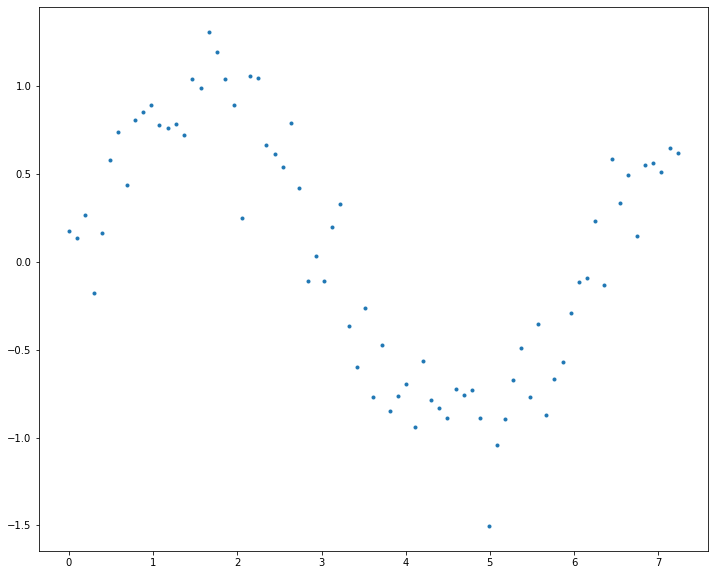

In [9]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)  #random 

y = np.sin(x) + np.random.normal(0,0.2,len(x)) 
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')